In [237]:
from pandas import read_excel, DataFrame,get_dummies
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sb
import sys
import os   
import statsmodels.api as sm
from pandas import concat
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from helper import my_logit,scailing,is_categorical,my_ols, independence_test, normality_test

In [238]:
df = read_excel("한국복지패널조사_2022년_17차_복지인식용.xlsx")

#### 사용변수
정부지출에 대한 의견

(가) 환경
(나) 건강보험 및 보건
(다) 국민연금(기초연금)
(라) 교육
(마) 주거지원
(바) 국방
(사) 치안 및 사회질서 유지
(아) 빈곤층 생활지원
(자) 노인 생활지원
(차) 장애인 생활지원
(카) 아이를 키우는 가족지원
(타) 청년 사회활동지원
(파) 외국인주민의 권리보장 지원
(하) 실업대책 및 고용보험
(갸) 문화와 예술
(냐) 정부행정업무
(댜) 양성평등정책 지원



소득 분배 인식

- 소득, 재산의 평등정도
- (가) 소득격차가 너무 크다
- (나) 소득격차 해소가 정부책임이다
- (다) 실업자에게 적정한 수준의 삶을 제공해야 한다
- (라) 빈곤한 사람들에게 주는 혜택을 줄여야 한다


빈곤원인 인식

- (가) 개인적인 절약과 적절한 가계(돈)관리 부족
- (나) 개인적인 동기와 스스로의 노력 부족
- (다) 개인적인 능력(타고난 재능)의 부족
- (라) 개인적인 책임감 및 자기규율의 부족(음주, 도박 등)
- (마) 개인적인 질환(질병)과 신체적 장애
- (바) 개인적인 학력수준의 미흡
- (사) 기업과 산업에서의 낮은 임금
- (아) 충분한 교육기회 제공의 부족
- (자) 좋은 일자리 공급의 미흡
- (차) 빈곤층 및 일부 집단에 대한 편견과 차별
-(카) 개인적인 불행과 불운(불우한 가족배경 등)

In [239]:
df

,가구패널ID,가구생성차수,가구분리일련번호,패널간가구머지키변수,"7차추가표본(1,800가구)구분","17차추가표본(2,012가구)구분",가구원진입차수,개인패널ID,조사대상가구원번호,표준가중치-횡단면데이터분석용(표본분석)(원표본),...,나보다돈을많이벌면서세금을적게내는사람이많다,복지예산을늘리기위해세금을더걷어야한다,"노인,아동,장애인을위한돈마련방법",사회서비스대상,사회문제해결의우선순위-1순위,사회문제해결의우선순위-2순위,정치에대한관심도,한국의정치상황에대한만족도,자신의정치적성향,사교육비
0,h17_id,h17_ind,h17_sn,h17_merkey,h_new,h_new1,h17_pind,h17_pid,wc17_fnum,wc17_ws_c,...,wc17_58,wc17_59,wc17_60,wc17_62,wc17_63,wc17_64,wc17_5aq4,wc17_5aq5,wc17_5aq6,h1707_3aq10
1,6,1,1,60101,0,0,1,601,1,0.4636,...,2,2,4,2,2,1,1,3,4,137
2,6,1,1,60101,0,0,1,602,2,0.752577,...,6,4,4,3,2,4,1,4,3,137
3,14,1,1,140101,0,0,1,1401,1,0.681501,...,4,2,4,3,3,2,3,2,4,0
4,15,1,1,150101,0,0,1,1501,1,0.493458,...,3,3,3,3,3,7,1,4,4,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,9789,7,1,97890701,1,0,7,978902,2,NaN,...,2,3,4,3,4,3,5,4,4,0
2986,9793,7,1,97930701,1,0,7,979301,1,NaN,...,4,4,4,3,1,2,3,3,4,8
2987,9793,7,1,97930701,1,0,7,979303,3,NaN,...,1,4,2,2,1,2,4,5,1,8
2988,9793,7,1,97930701,1,0,7,979304,4,NaN,...,2,3,4,3,2,6,3,4,3,8


#### 정부지출에 대한 의견 

1. 훨씬 더 많이 지출        2. 좀 더 지출         3. 현재수준으로 지출
4. 조금 덜 지출               5. 훨씬 덜 지출      6. 선택할 수 없음


In [240]:
column_names = [
    "(다)국민연금(기초연금)", "(라)교육", "(마)주거지원",  "(사)치안및사회질서유지", "(아)빈곤층생활지원",
     "(카)아이를키우는가족지원","(하)실업대책및고용보험", "(갸)문화와예술","사교육비"
]

정부지출 =df[column_names]

In [241]:
정부지출 = 정부지출.drop(0)

In [242]:
정부지출 = 정부지출[(정부지출['사교육비'] != 0)]

In [243]:
정부지출 = 정부지출.dropna()

In [244]:
중앙값=정부지출.groupby('사교육비').median()

In [245]:
중앙값

,(다)국민연금(기초연금),(라)교육,(마)주거지원,(사)치안및사회질서유지,(아)빈곤층생활지원,(카)아이를키우는가족지원,(하)실업대책및고용보험,(갸)문화와예술
사교육비,,,,,,,,
0.8,2.0,4.0,1.0,4.0,3.0,1.0,2.0,4.0
1.0,3.0,2.0,2.0,3.0,3.0,3.0,3.5,4.0
2.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0
3.0,3.0,2.0,2.5,1.0,3.0,2.5,2.5,2.0
4.0,3.0,2.5,2.5,3.0,2.5,1.5,3.0,3.5
...,...,...,...,...,...,...,...,...
211.0,2.5,2.0,3.0,2.0,3.0,3.0,3.5,3.0
215.0,4.0,3.5,4.5,3.0,3.0,2.0,3.0,2.5
325.0,3.0,3.5,4.0,3.0,3.5,3.5,4.0,3.5


In [246]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

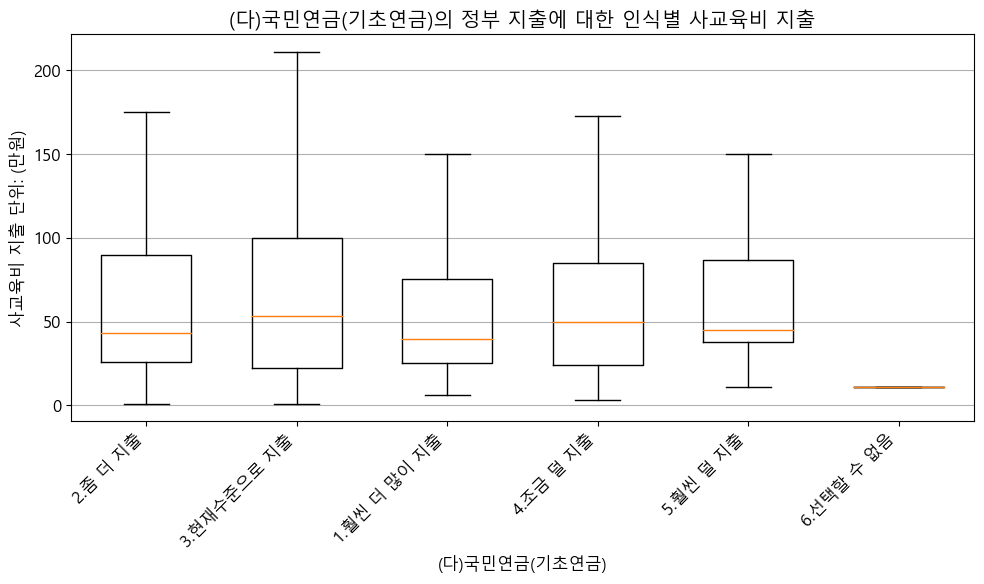

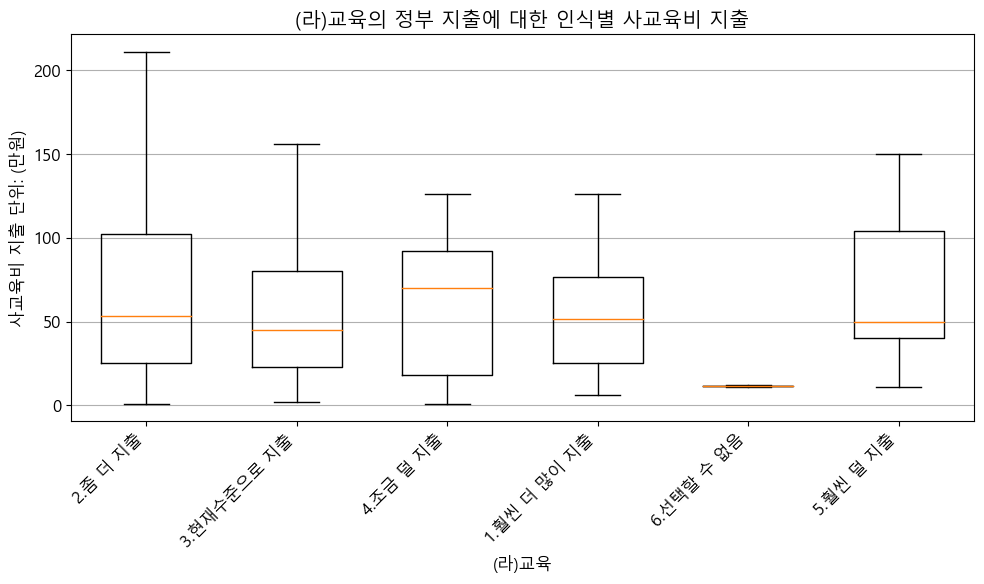

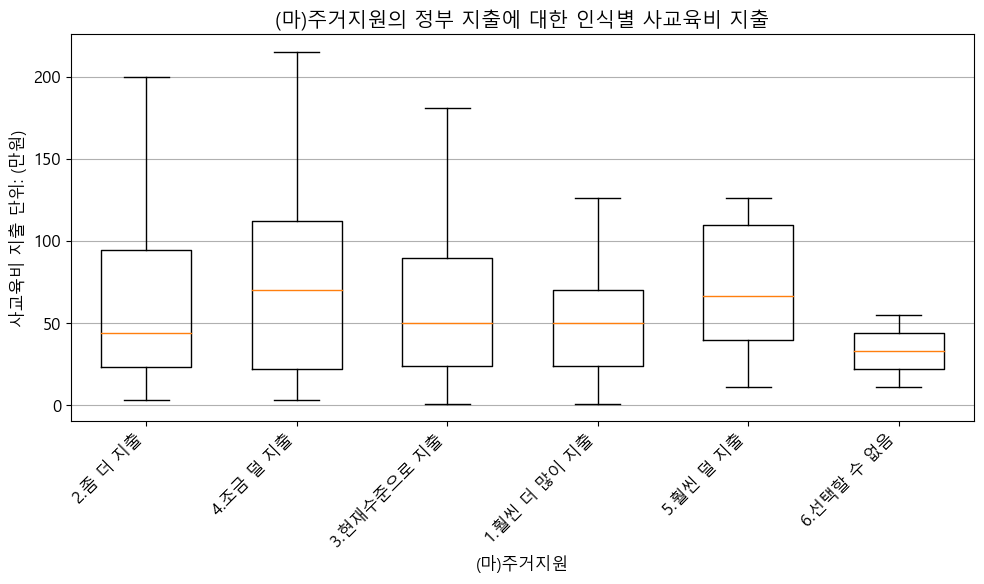

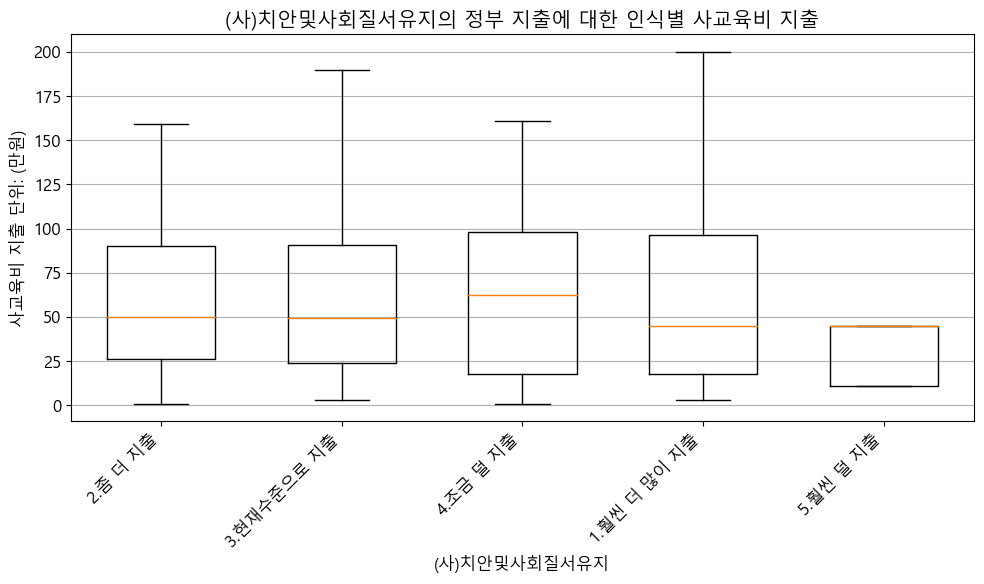

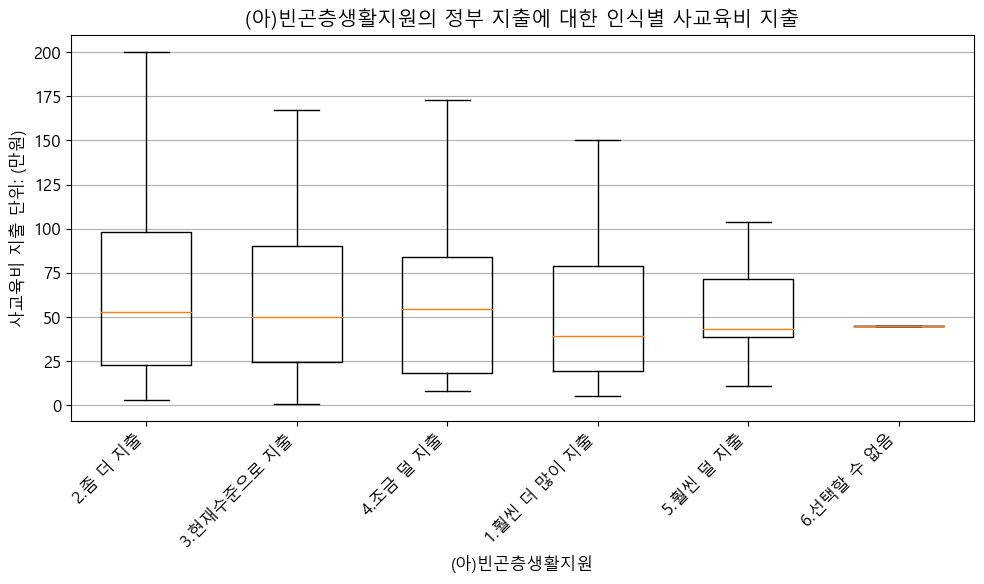

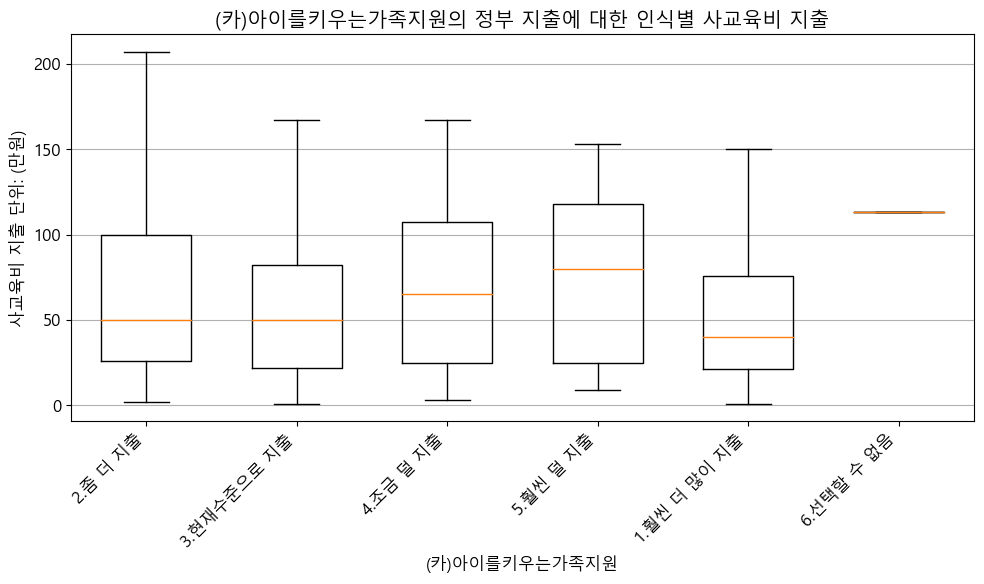

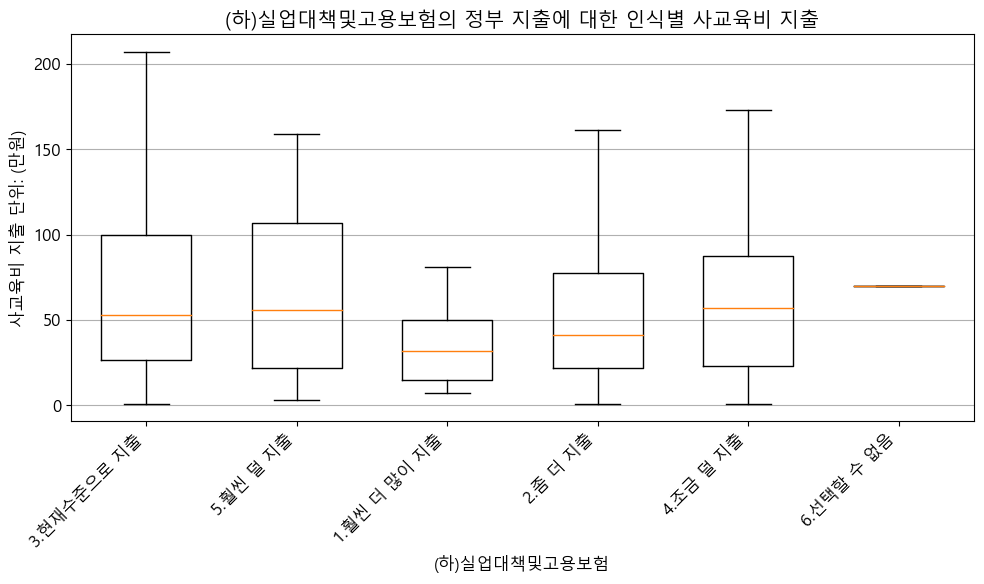

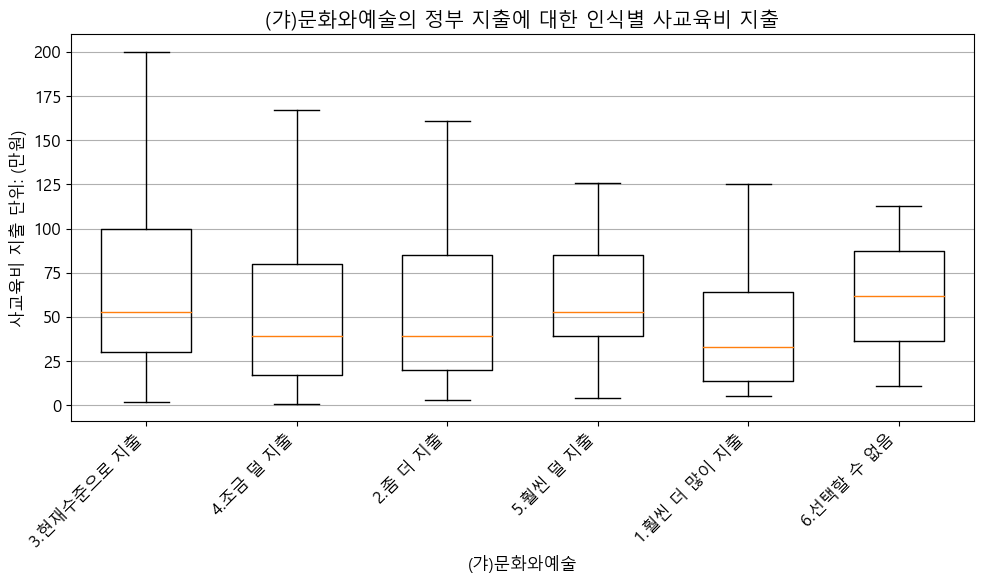

In [247]:

category_columns = [
    "(다)국민연금(기초연금)", 
    "(라)교육", 
    "(마)주거지원",
    "(사)치안및사회질서유지",
     "(아)빈곤층생활지원",
    "(카)아이를키우는가족지원", 
    "(하)실업대책및고용보험",
    "(갸)문화와예술"
]

legends = ["1.훨씬 더 많이 지출", "2.좀 더 지출", "3.현재수준으로 지출", "4.조금 덜 지출", "5.훨씬 덜 지출", "6.선택할 수 없음"]

# Loop through each category column
for category_column in category_columns:
    unique_categories = 정부지출[category_column].unique()
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    box_data = [정부지출[정부지출[category_column] == category]['사교육비'] for category in unique_categories]
    
    boxplot = ax.boxplot(box_data, labels=[legends[cat - 1] for cat in unique_categories], widths=0.6, showfliers=False)
    ax.set_xlabel(category_column)
    ax.set_ylabel("사교육비 지출 단위: (만원)")
    ax.set_title(f"{category_column}의 정부 지출에 대한 인식별 사교육비 지출")
    ax.grid(axis='y')
    
    x_tick_positions = range(1, len(unique_categories) + 1)
    ax.set_xticks(x_tick_positions)
    ax.set_xticklabels([legends[cat - 1] for cat in unique_categories], rotation=45, ha='right')
    
    plt.tight_layout()
    plt.savefig(f"boxplot_{category_column}.png")

    plt.show()


#### 소득분배 인식


In [248]:
column_names = [
'소득,재산의평등정도',
"(가)소득격차가너무크다",
"(나)소득격차해소가정부책임이다",
"(다)실업자에게적정한수준의삶을제공해야한다",
"(라)빈곤한사람들에게주는혜택을줄여야한다",
"사교육비"
]

소득분배인식 = df[column_names]
소득분배인식 = 소득분배인식[(소득분배인식['사교육비'] != 0)]
소득분배인식.drop(0,inplace =True)
소득분배인식=소득분배인식.dropna()

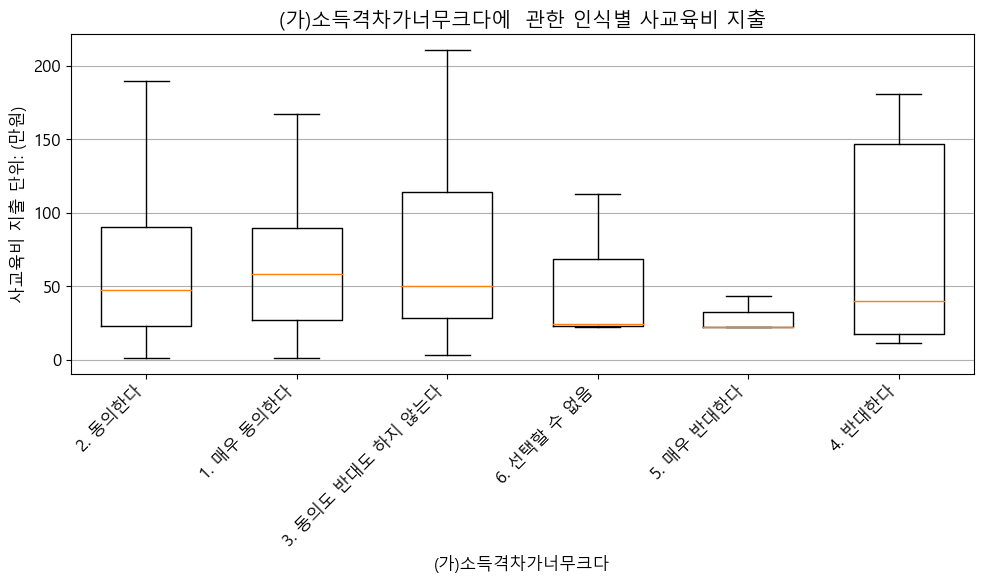

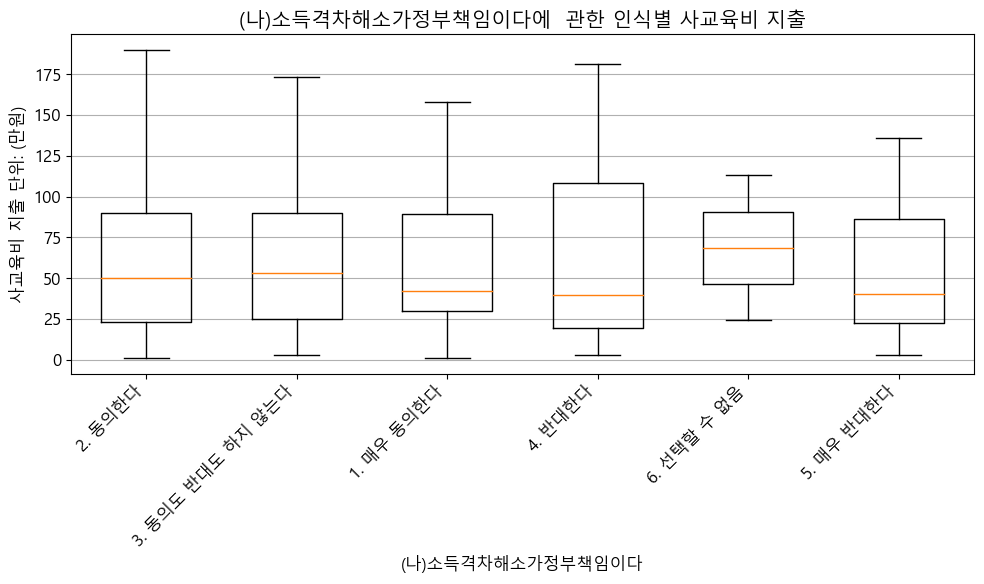

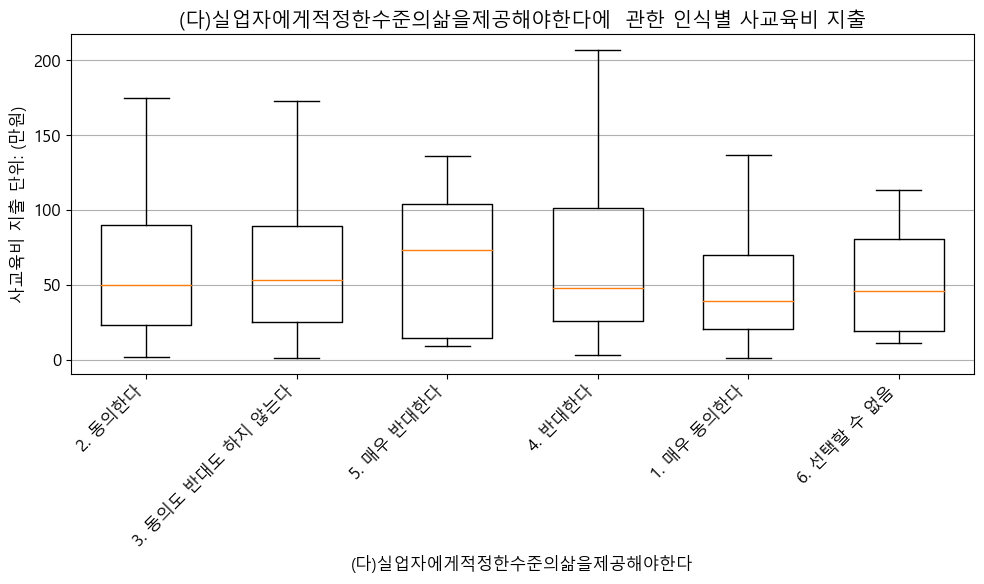

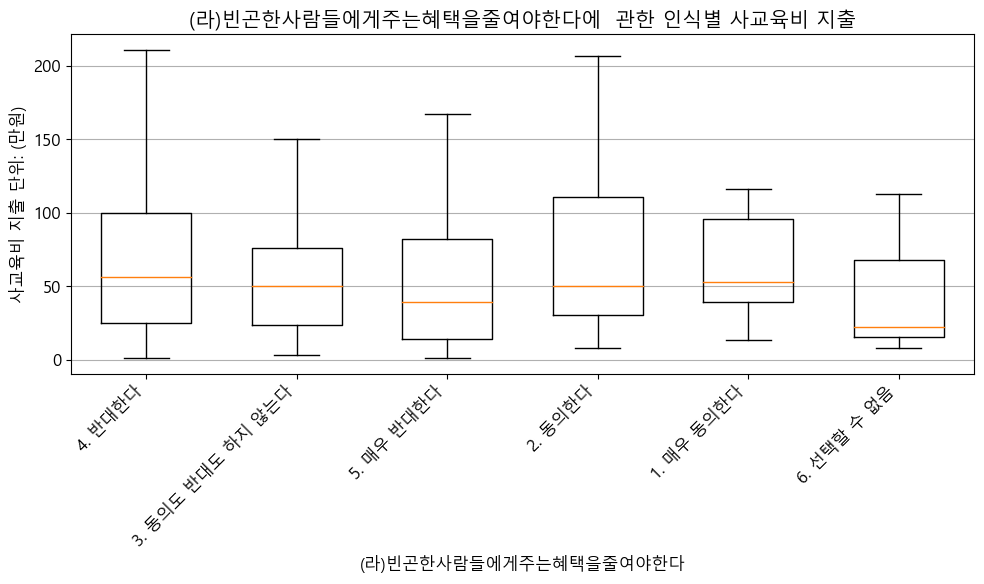

In [249]:
category_columns = [
"(가)소득격차가너무크다",
"(나)소득격차해소가정부책임이다",
"(다)실업자에게적정한수준의삶을제공해야한다",
"(라)빈곤한사람들에게주는혜택을줄여야한다"
]

legends = [
    "1. 매우 동의한다",
    "2. 동의한다",
    "3. 동의도 반대도 하지 않는다",
    "4. 반대한다",
    "5. 매우 반대한다",
    "6. 선택할 수 없음"
]

for category_column in category_columns:
    unique_categories = 소득분배인식[category_column].unique()
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    box_data = [소득분배인식[소득분배인식[category_column] == category]['사교육비'] for category in unique_categories]
    
    boxplot = ax.boxplot(box_data, labels=[legends[cat - 1] for cat in unique_categories], widths=0.6, showfliers=False)
    ax.set_xlabel(category_column)
    ax.set_ylabel("사교육비 지출 단위: (만원)")
    ax.set_title(f"{category_column}에  관한 인식별 사교육비 지출")
    ax.grid(axis='y')
    
    x_tick_positions = range(1, len(unique_categories) + 1)
    ax.set_xticks(x_tick_positions)
    ax.set_xticklabels([legends[cat - 1] for cat in unique_categories], rotation=45, ha='right')
    
    plt.tight_layout()
    plt.savefig(f"boxplot_{category_column}.png")

    plt.show()


#### 빈곤원인 인식











In [250]:
column_names = [
    "(가)개인적인절약과적절한가계(돈)관리부족",
    "(나)개인적인동기와스스로의노력부족",
    "(다)개인적인능력(타고난재능)의부족",
    "(라)개인적인책임감및자기규율의부족(음주,도박등)",
    "(마)개인적인질환(질병)과신체적장애",
    "(바)개인적인학력수준의미흡",
    "(사)기업과산업에서의낮은임금",
    "(아)충분한교육기회제공의부족",
    "(자)좋은일자리공급의미흡",
    "(차)빈곤층및일부집단에대한편견과차별",
    "(카)개인적인불행과불운(불우한가족배경등)",
    "사교육비"
]

빈곤원인인식 = df[column_names]
빈곤원인인식 = 빈곤원인인식[(빈곤원인인식['사교육비'] != 0)]
빈곤원인인식.drop(0,inplace =True)
빈곤원인인식=빈곤원인인식.dropna()
빈곤원인인식

,(가)개인적인절약과적절한가계(돈)관리부족,(나)개인적인동기와스스로의노력부족,(다)개인적인능력(타고난재능)의부족,"(라)개인적인책임감및자기규율의부족(음주,도박등)",(마)개인적인질환(질병)과신체적장애,(바)개인적인학력수준의미흡,(사)기업과산업에서의낮은임금,(아)충분한교육기회제공의부족,(자)좋은일자리공급의미흡,(차)빈곤층및일부집단에대한편견과차별,(카)개인적인불행과불운(불우한가족배경등),사교육비
1,3,1,3,4,4,4,4,4,4,3,4,137
2,3,1,4,4,4,3,3,2,1,2,1,137
4,2,2,2,1,1,1,1,2,1,3,2,67
11,1,1,2,1,2,2,2,3,1,2,1,10
12,1,2,2,1,2,2,2,3,1,2,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...
2965,1,2,2,1,2,1,2,1,3,3,2,57
2966,2,2,2,2,2,2,2,2,2,3,2,6
2986,2,2,2,2,2,3,2,3,2,2,2,8
2987,1,2,1,1,2,1,1,1,1,1,2,8


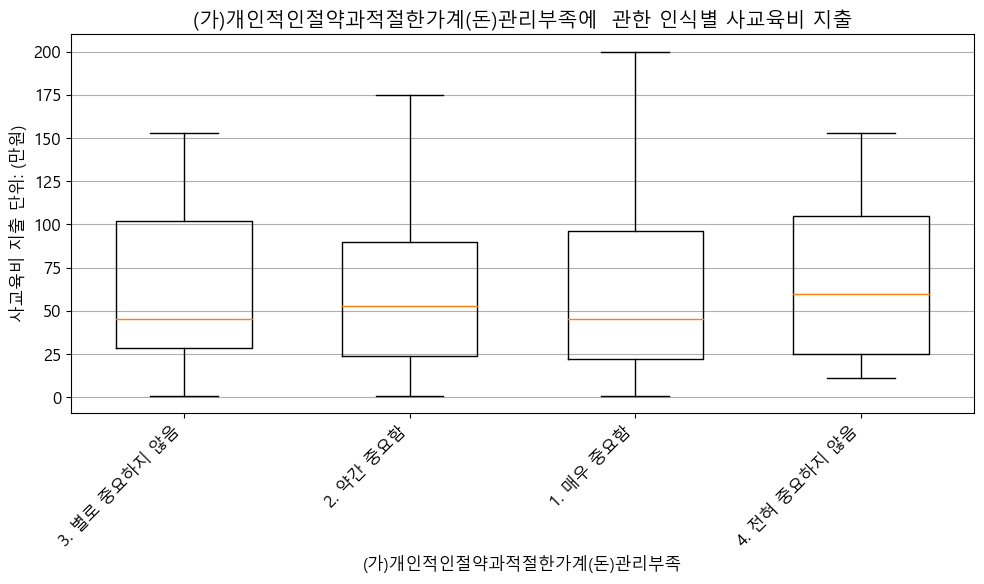

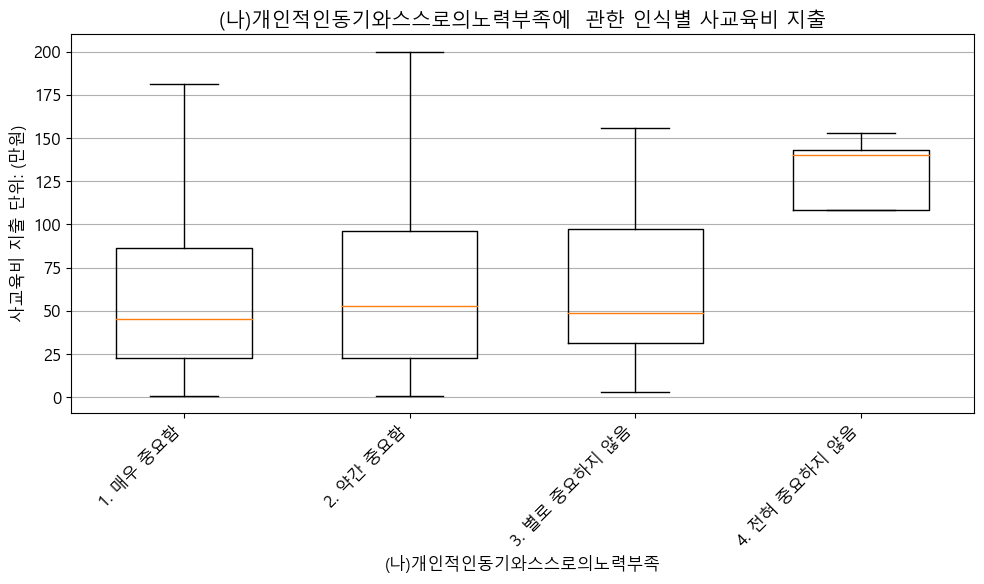

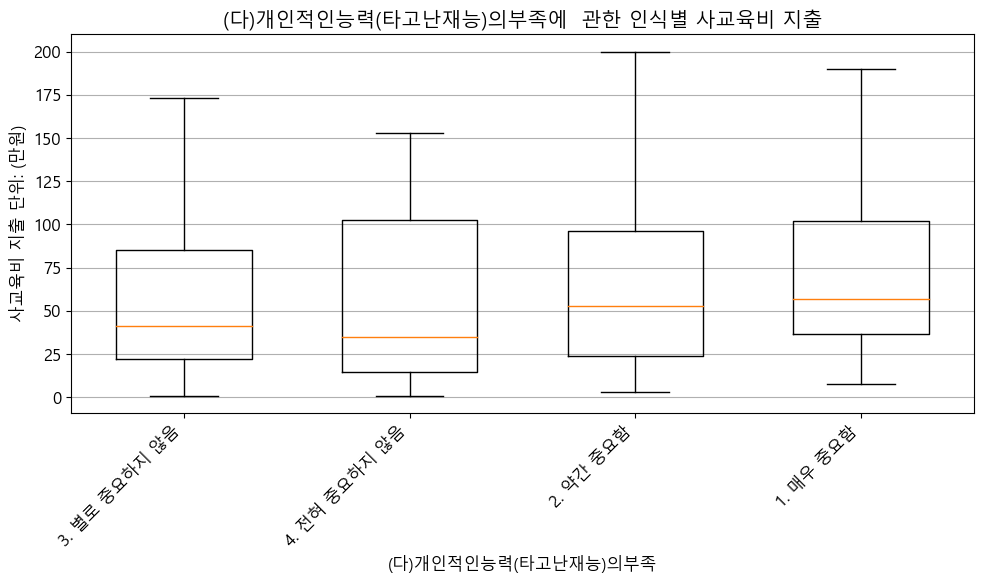

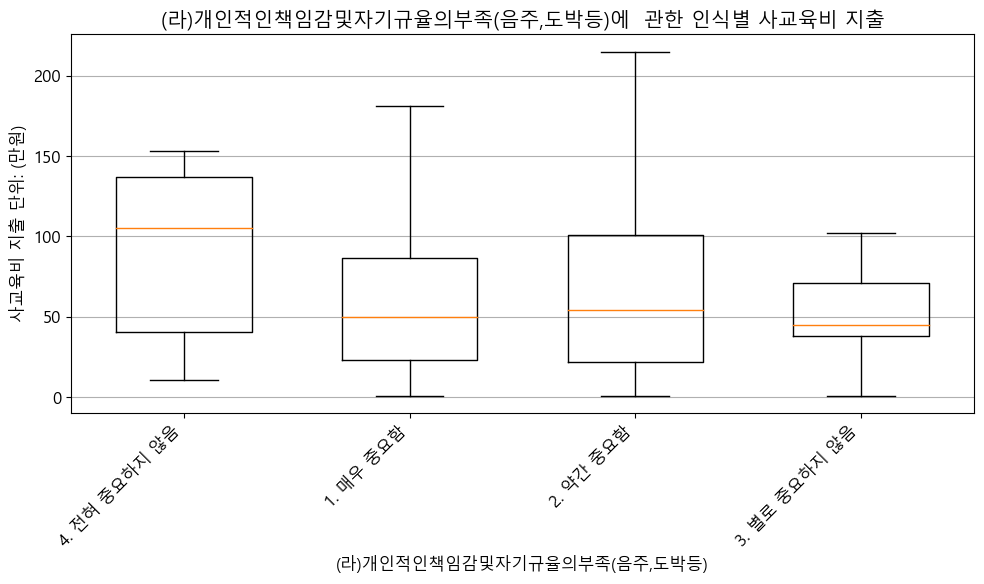

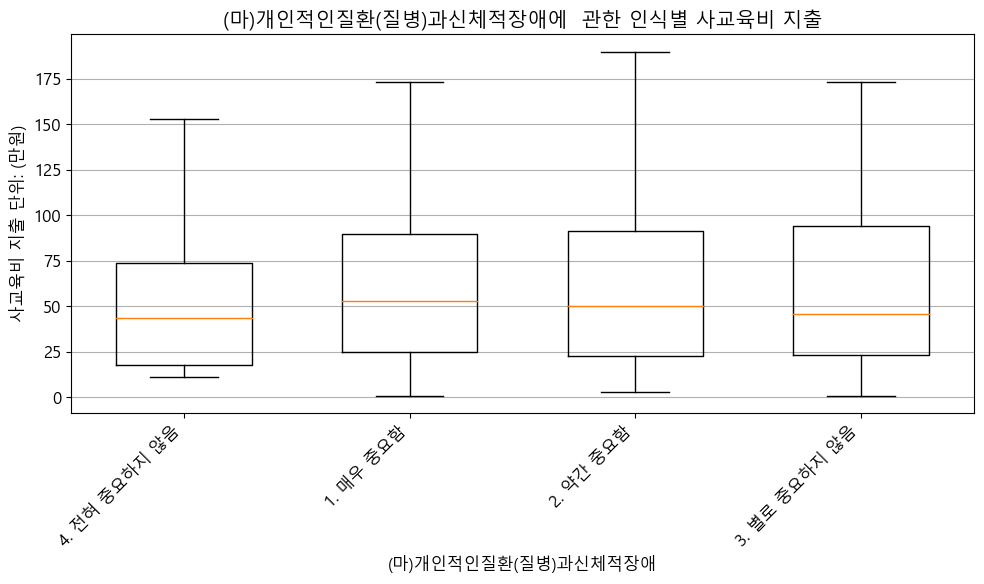

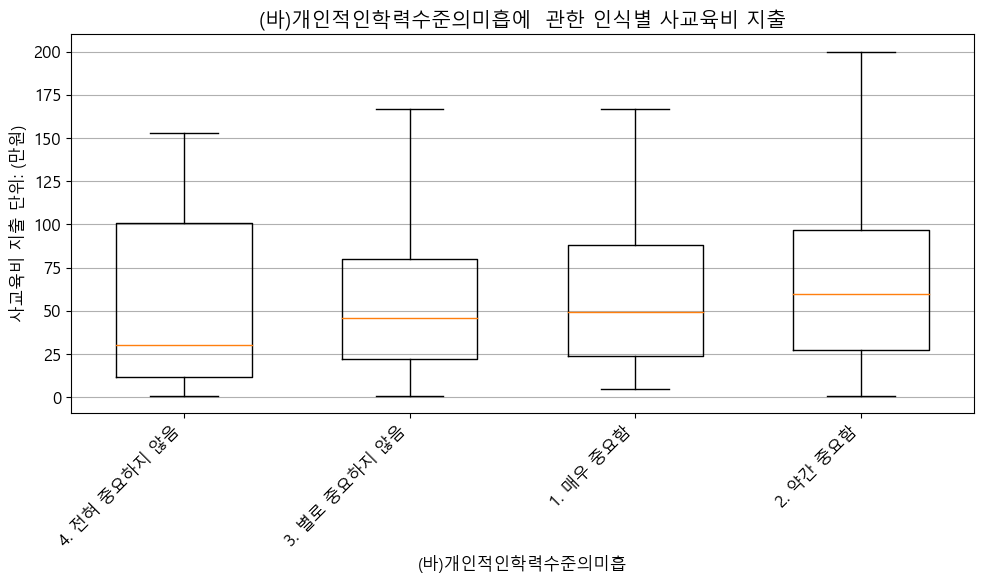

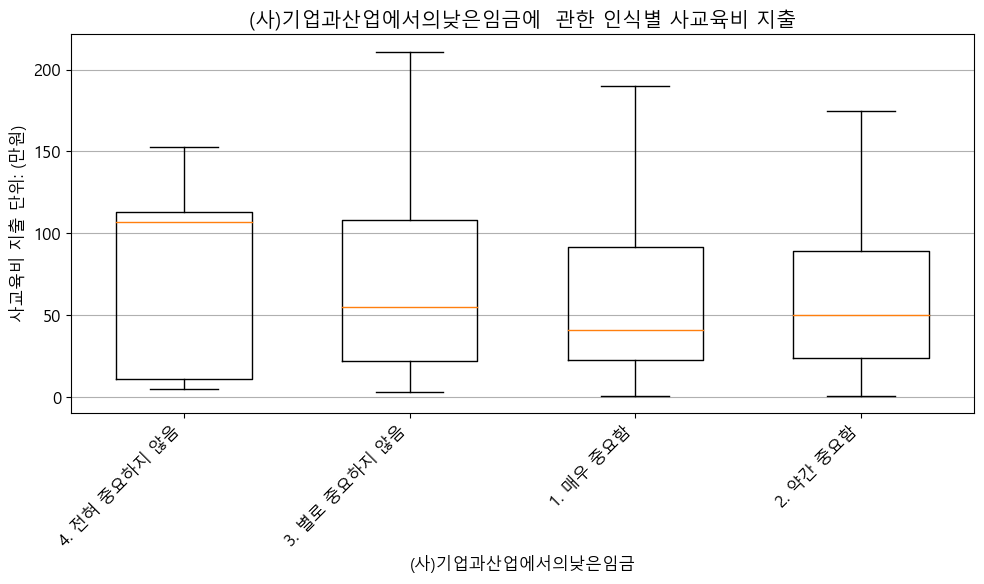

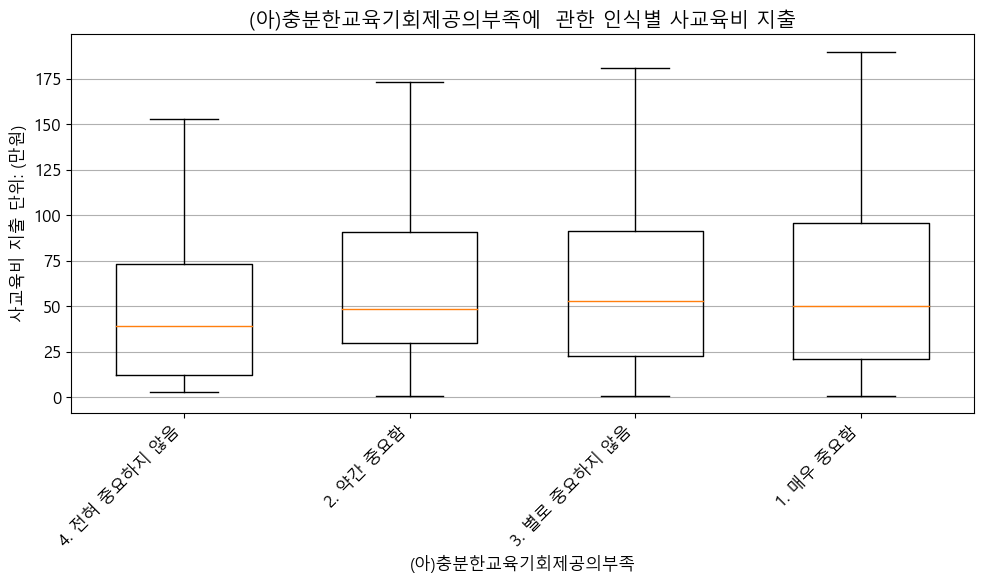

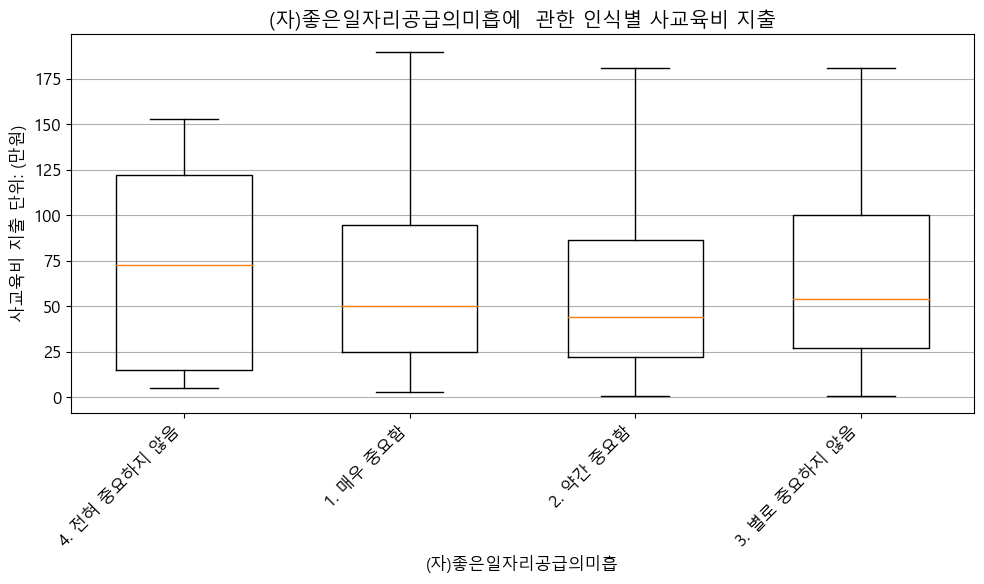

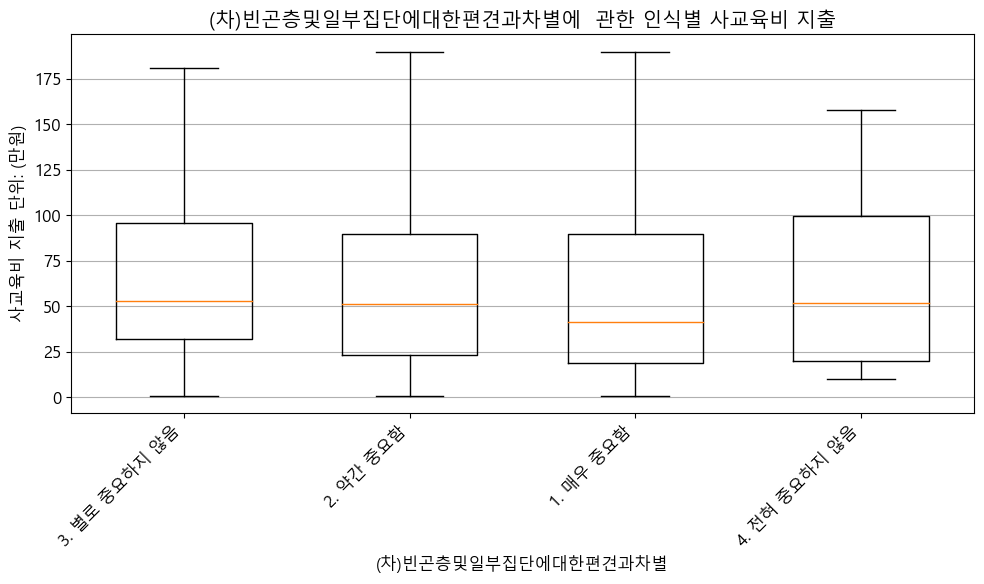

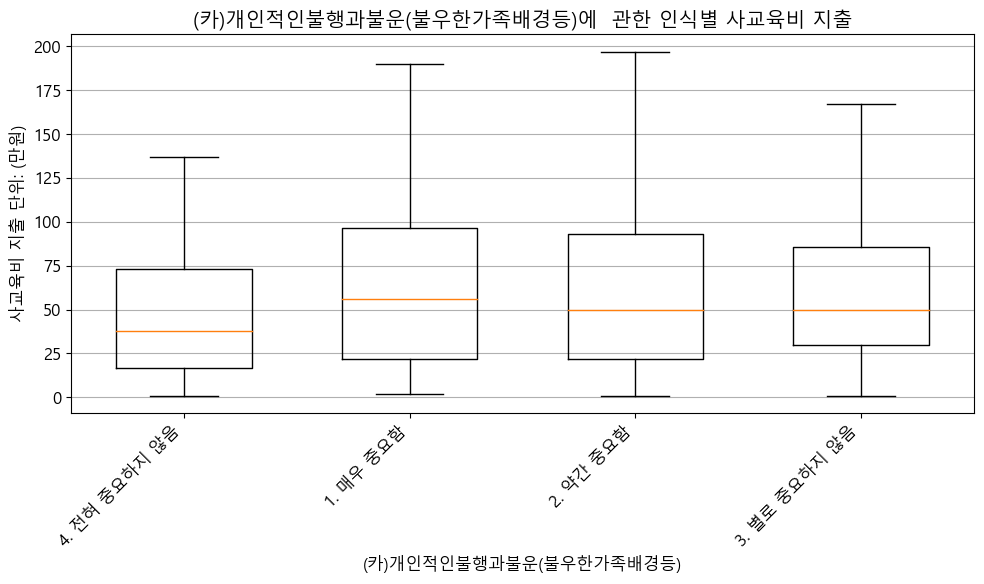

In [251]:
category_columns = [
    "(가)개인적인절약과적절한가계(돈)관리부족",
    "(나)개인적인동기와스스로의노력부족",
    "(다)개인적인능력(타고난재능)의부족",
    "(라)개인적인책임감및자기규율의부족(음주,도박등)",
    "(마)개인적인질환(질병)과신체적장애",
    "(바)개인적인학력수준의미흡",
    "(사)기업과산업에서의낮은임금",
    "(아)충분한교육기회제공의부족",
    "(자)좋은일자리공급의미흡",
    "(차)빈곤층및일부집단에대한편견과차별",
    "(카)개인적인불행과불운(불우한가족배경등)"
]

legends = [
    "1. 매우 중요함",
    "2. 약간 중요함",
    "3. 별로 중요하지 않음",
    "4. 전혀 중요하지 않음"
]

for category_column in category_columns:
    unique_categories = 빈곤원인인식[category_column].unique()
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    box_data = [빈곤원인인식[빈곤원인인식[category_column] == category]['사교육비'] for category in unique_categories]
    
    boxplot = ax.boxplot(box_data, labels=[legends[cat - 1] for cat in unique_categories], widths=0.6, showfliers=False)
    ax.set_xlabel(category_column)
    ax.set_ylabel("사교육비 지출 단위: (만원)")
    ax.set_title(f"{category_column}에  관한 인식별 사교육비 지출")
    ax.grid(axis='y')
    
    x_tick_positions = range(1, len(unique_categories) + 1)
    ax.set_xticks(x_tick_positions)
    ax.set_xticklabels([legends[cat - 1] for cat in unique_categories], rotation=45, ha='right')
    
    plt.tight_layout()
    plt.savefig(f"boxplot_{category_column}.png")
    plt.show()


In [265]:
category_columns = [
    "(다)국민연금(기초연금)", 
    "(라)교육", 
    "(마)주거지원",
    "(사)치안및사회질서유지",
     "(아)빈곤층생활지원",
    "(카)아이를키우는가족지원", 
    "(하)실업대책및고용보험",
    "(갸)문화와예술",
    "(가)소득격차가너무크다",
    "(나)소득격차해소가정부책임이다",
    "(다)실업자에게적정한수준의삶을제공해야한다",
    "(라)빈곤한사람들에게주는혜택을줄여야한다",
     "(가)개인적인절약과적절한가계(돈)관리부족",
    "(나)개인적인동기와스스로의노력부족",
    "(다)개인적인능력(타고난재능)의부족",
    "(라)개인적인책임감및자기규율의부족(음주,도박등)",
    "(마)개인적인질환(질병)과신체적장애",
    "(바)개인적인학력수준의미흡",
    "(사)기업과산업에서의낮은임금",
    "(아)충분한교육기회제공의부족",
    "(자)좋은일자리공급의미흡",
    "(차)빈곤층및일부집단에대한편견과차별",
    "(카)개인적인불행과불운(불우한가족배경등)",
    "사교육비"
]


In [266]:
기술통계 = df[category_columns]
기술통계 = 기술통계[(기술통계['사교육비'] != 0)]
기술통계.drop(0,inplace =True)
기술통계=기술통계.dropna()
기술통계

,(다)국민연금(기초연금),(라)교육,(마)주거지원,(사)치안및사회질서유지,(아)빈곤층생활지원,(카)아이를키우는가족지원,(하)실업대책및고용보험,(갸)문화와예술,(가)소득격차가너무크다,(나)소득격차해소가정부책임이다,...,(다)개인적인능력(타고난재능)의부족,"(라)개인적인책임감및자기규율의부족(음주,도박등)",(마)개인적인질환(질병)과신체적장애,(바)개인적인학력수준의미흡,(사)기업과산업에서의낮은임금,(아)충분한교육기회제공의부족,(자)좋은일자리공급의미흡,(차)빈곤층및일부집단에대한편견과차별,(카)개인적인불행과불운(불우한가족배경등),사교육비
1,2,2,2,2,2,2,3,3,2,2,...,3,4,4,4,4,4,4,3,4,137
2,3,3,4,3,3,2,5,4,2,2,...,4,4,4,3,3,2,1,2,1,137
4,3,3,2,3,2,2,3,3,1,2,...,2,1,1,1,1,2,1,3,2,67
11,3,2,3,3,2,3,1,3,2,2,...,2,1,2,2,2,3,1,2,1,10
12,3,3,3,3,2,3,1,3,2,2,...,2,1,2,2,2,3,1,2,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,3,3,2,3,2,3,3,3,3,2,...,2,1,2,1,2,1,3,3,2,57
2966,2,2,2,2,2,2,2,2,3,3,...,2,2,2,2,2,2,2,3,2,6
2986,3,3,3,3,3,3,3,3,2,2,...,2,2,2,3,2,3,2,2,2,8
2987,3,3,3,4,4,3,1,1,2,3,...,1,1,2,1,1,1,1,1,2,8


In [267]:
import pandas as pd
from scipy.stats import f_oneway

In [272]:
# Perform ANOVA test for each category column
results = []
for category_column in category_columns:
    categories = 기술통계[category_column].unique()
    category_data = [기술통계[기술통계[category_column] == category]["사교육비"] for category in categories]
    f_statistic, p_value = f_oneway(*category_data)
    results.append((category_column, f_statistic, p_value))

# Display results
for result in results:
    if result[2] < 0.2:
        print(f"{result[0]} - F-statistic: {result[1]}, p-value: {result[2]}")


(마)주거지원 - F-statistic: 1.5031321668145463, p-value: 0.18722020839331982
(갸)문화와예술 - F-statistic: 1.526207544147995, p-value: 0.17998305475767826
(라)빈곤한사람들에게주는혜택을줄여야한다 - F-statistic: 1.598732096490153, p-value: 0.15881524412775494
(나)개인적인동기와스스로의노력부족 - F-statistic: 1.8004767584130483, p-value: 0.14614921903668193
(라)개인적인책임감및자기규율의부족(음주,도박등) - F-statistic: 2.7324380877374326, p-value: 0.043239140335570414
사교육비 - F-statistic: inf, p-value: 0.0
